In [1]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction\\research'

In [2]:
import os

In [3]:
os.chdir('../')

In [4]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction'

In [5]:
from stroke_risk.constants import *
from stroke_risk.utils.common import read_yaml

In [6]:
config_filepath = CONFIG_FILE_PATH

In [7]:
config = read_yaml(config_filepath)

[2024-01-04 22:44:00,233: INFO: common: yaml file: config\config.yaml loaded successfully]


In [8]:
config

ConfigBox({'artifacts_root': 'artifacts', 'data_ingestion': {'root_dir': 'artifacts/data_ingestion', 'source_URL': 'https://drive.google.com/file/d/1wzvRf9zGZi6rztGd4m8vdzhGriAmfF9j/view?usp=sharing', 'local_data_file': 'artifacts/data_ingestion/data.zip', 'unzip_dir': 'artifacts/data_ingestion'}, 'data_preprocess': {'root_dir': 'artifacts/data_preprocess', 'data_dir': 'artifacts/data_ingestion', 'dataset_name': 'healthcare-dataset-stroke-data.csv', 'save_data_file': 'artifacts/data_preprocess/data.csv'}, 'data_validation': {'root_dir': 'artifacts/data_validation', 'data_dir': 'artifacts/data_preprocess/data.csv', 'status_file': 'artifacts/data_validation/status.txt'}, 'data_transformation': {'root_dir': 'artifacts/data_transformation', 'data_file': 'artifacts/data_preprocess/data.csv'}, 'model_training': {'root_dir': 'artifacts/model_training', 'train_data_path': 'artifacts/data_transformation/train.csv', 'model_name': 'model.joblib'}, 'model_evaluation': {'root_dir': 'artifacts/model

In [9]:
config.artifacts_root

'artifacts'

In [10]:
config = config.data_preprocess

In [11]:
root_dir=config.root_dir
data_dir=config.data_dir
dataset_name=config.dataset_name
save_data_file=config.save_data_file

In [12]:
Path(data_dir,dataset_name)

WindowsPath('artifacts/data_ingestion/healthcare-dataset-stroke-data.csv')

In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv(Path(data_dir,dataset_name))

In [15]:
data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [16]:
data.shape

(5110, 12)

In [17]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
data.age = data.age.astype(np.int64)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [20]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
data.age

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [22]:
print(f'max-age = {max(data.age)}\nmin-age = {min(data.age)}')

max-age = 82
min-age = 0


In [23]:
data['age_bin'] = pd.cut(data['age'], bins=[0, 35, 50, 65, 75, np.inf], labels=['0-35', '36-50', '51-65', '65-75', '75+'])

In [24]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [25]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [26]:
data = data[data['gender'] != 'Other']

In [27]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [28]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [29]:
cata_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data[cata_col] = data[cata_col].astype('category')

In [30]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [31]:
data['gender_age']=data.gender.astype(str) + '_' + data.age_bin.astype(str)

In [32]:
data.loc[:,'gender_age']=data.gender.astype(str) + '_' + data.age_bin.astype(str)

In [33]:
data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,gender_age
5100,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0,75+,Male_75+
5101,36901,Female,45,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0,36-50,Female_36-50
5102,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0,51-65,Female_51-65
5103,22127,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0,0-35,Female_0-35
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0,0-35,Female_0-35
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,75+,Female_75+
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,75+,Female_75+
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0-35,Female_0-35
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-65,Male_51-65
5109,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0,36-50,Female_36-50


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
sub_data = data[['gender','stroke']]

In [36]:
grouped_data = sub_data.groupby(['gender', 'stroke']).size().unstack()

C:\Users\asbpi\AppData\Local\Temp\ipykernel_22596\1352699620.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sub_data.groupby(['gender', 'stroke']).size().unstack()


In [37]:
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)*100
grouped_data_percentage

stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383


<Figure size 800x1600 with 0 Axes>

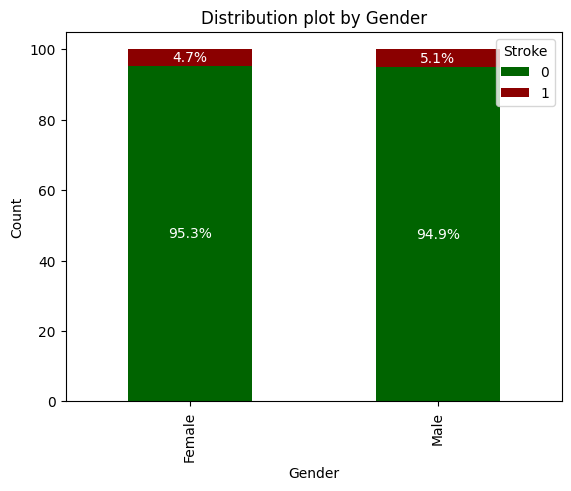

In [38]:
plt.figure(figsize=(8, 16))

ax = grouped_data_percentage.plot(kind='bar', stacked=True, color=['darkgreen', 'darkred'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution plot by Gender')
plt.legend(title='Stroke', loc='upper right')

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')


plt.show()

In [39]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_bin               43
gender_age             0
dtype: int64

In [40]:
data = data[~data.age_bin.isnull()]

In [41]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  200
smoking_status         0
stroke                 0
age_bin                0
gender_age             0
dtype: int64

In [42]:
data.gender_age.value_counts()

gender_age
Female_0-35     1084
Male_0-35        771
Female_36-50     677
Female_51-65     646
Male_51-65       516
Male_36-50       407
Female_75+       287
Female_65-75     285
Male_65-75       215
Male_75+         178
Name: count, dtype: int64

C:\Users\asbpi\AppData\Local\Temp\ipykernel_22596\685039028.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sub_data.groupby(['gender', 'gender_age', 'stroke']).size().unstack()


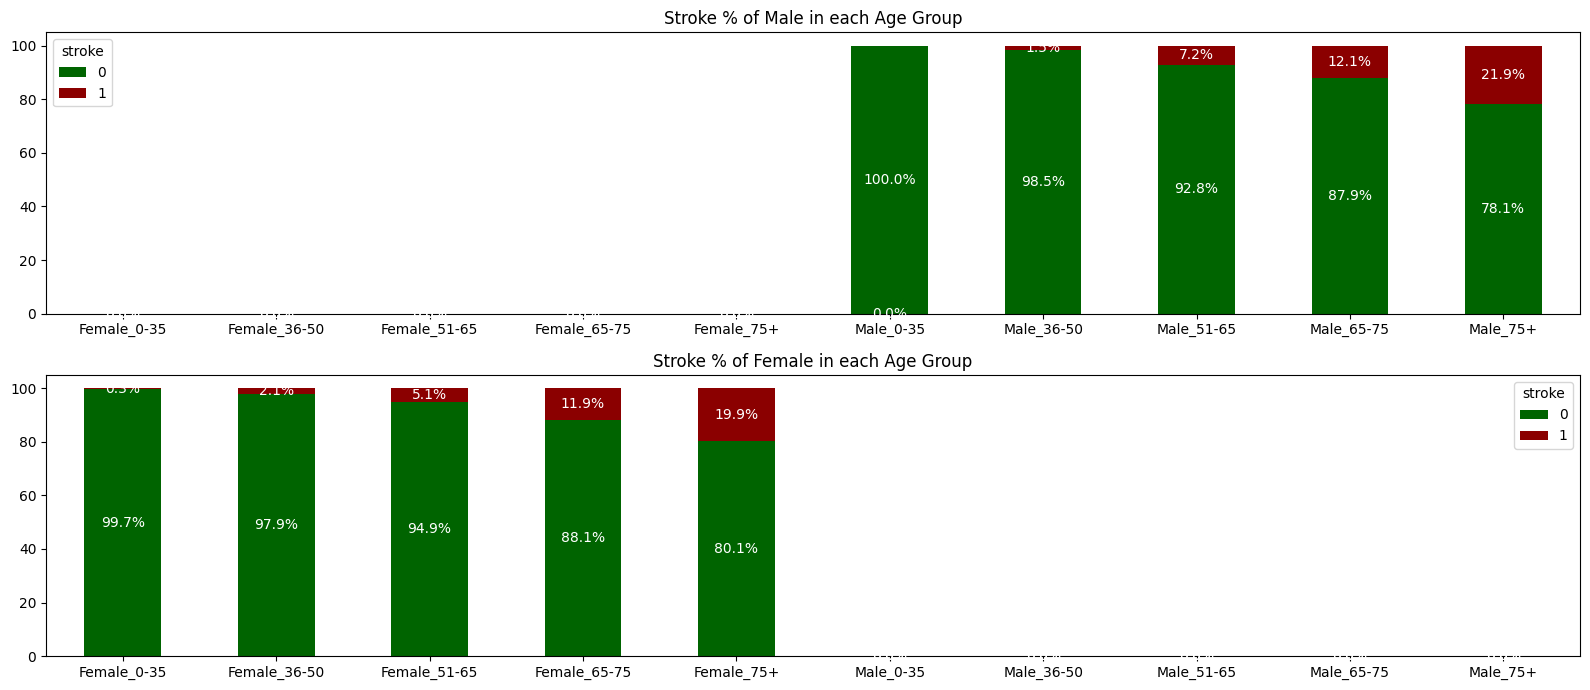

In [43]:
sub_data = data[['gender', 'gender_age', 'stroke']]
grouped_data = sub_data.groupby(['gender', 'gender_age', 'stroke']).size().unstack()
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)*100

male_data = grouped_data_percentage.xs('Male', level='gender', axis=0, drop_level=True)
female_data = grouped_data_percentage.xs('Female', level='gender', axis=0, drop_level=True)
datalist = [male_data, female_data]
gender = ['Male', 'Female']


fig,axs = plt.subplots(2,1, figsize=(16,7))

for i in range(2):
    ax = datalist[i].plot(kind='bar', stacked=True, color=['darkgreen', 'darkred'],ax=axs[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_xlabel('')
    ax.set_title(f'Stroke % of {gender[i]} in each Age Group')
    for j in ax.patches:
        width, height = j.get_width(), j.get_height()
        x, y = j.get_xy() 
        percentage = f'{height:.1f}%'
        ax.annotate(percentage, (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

In [44]:
# Substitute bmi 

In [45]:
data.bmi.isnull().sum()

200

In [46]:
# Calculate the mean BMI for each 'gender_age' group
mean_bmi = data.groupby('gender_age')['bmi'].transform('mean')

# Replace the missing values in the 'bmi' column with the mean BMI of the corresponding 'gender_age' group
data.loc[data['bmi'].isnull(), 'bmi'] = mean_bmi

mean_bmi[[1,8,13]]


1     31.552791
8     31.552791
13    28.279878
Name: bmi, dtype: float64

In [47]:
data.bmi[[1,8,13]]

1     31.552791
8     31.552791
13    28.279878
Name: bmi, dtype: float64

In [48]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_bin              0
gender_age           0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5066 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5066 non-null   int64   
 1   gender             5066 non-null   category
 2   age                5066 non-null   int64   
 3   hypertension       5066 non-null   int64   
 4   heart_disease      5066 non-null   int64   
 5   ever_married       5066 non-null   category
 6   work_type          5066 non-null   category
 7   Residence_type     5066 non-null   category
 8   avg_glucose_level  5066 non-null   float64 
 9   bmi                5066 non-null   float64 
 10  smoking_status     5066 non-null   category
 11  stroke             5066 non-null   int64   
 12  age_bin            5066 non-null   category
 13  gender_age         5066 non-null   object  
dtypes: category(6), float64(2), int64(5), object(1)
memory usage: 515.9+ KB


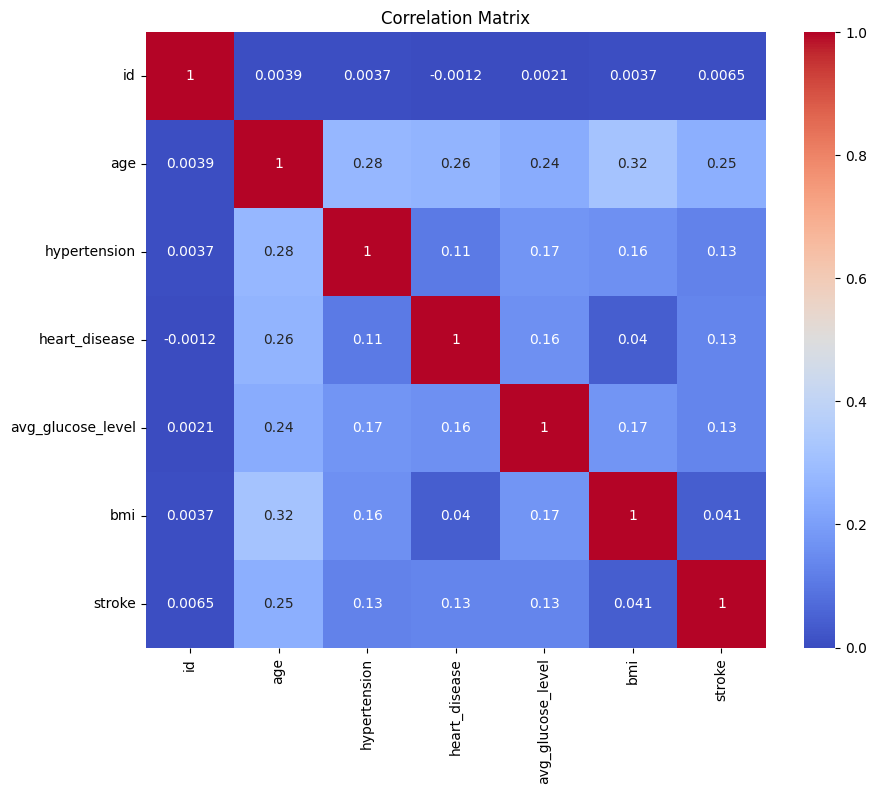

In [50]:
data_numeric = data.select_dtypes(include=[np.number])

correlation_matrix = data_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [51]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_bin', 'gender_age'],
      dtype='object')

In [52]:
data.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1501
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [53]:
data.work_type.value_counts()

work_type
Private          2924
Self-employed     819
Govt_job          657
children          644
Never_worked       22
Name: count, dtype: int64

In [54]:
data.Residence_type.value_counts()

Residence_type
Urban    2573
Rural    2493
Name: count, dtype: int64

In [55]:
data.ever_married.value_counts()

ever_married
Yes    3353
No     1713
Name: count, dtype: int64

C:\Users\asbpi\AppData\Local\Temp\ipykernel_22596\857688167.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sub_data.groupby([cols[i], 'stroke']).size().unstack()
C:\Users\asbpi\AppData\Local\Temp\ipykernel_22596\857688167.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sub_data.groupby([cols[i], 'stroke']).size().unstack()
C:\Users\asbpi\AppData\Local\Temp\ipykernel_22596\857688167.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

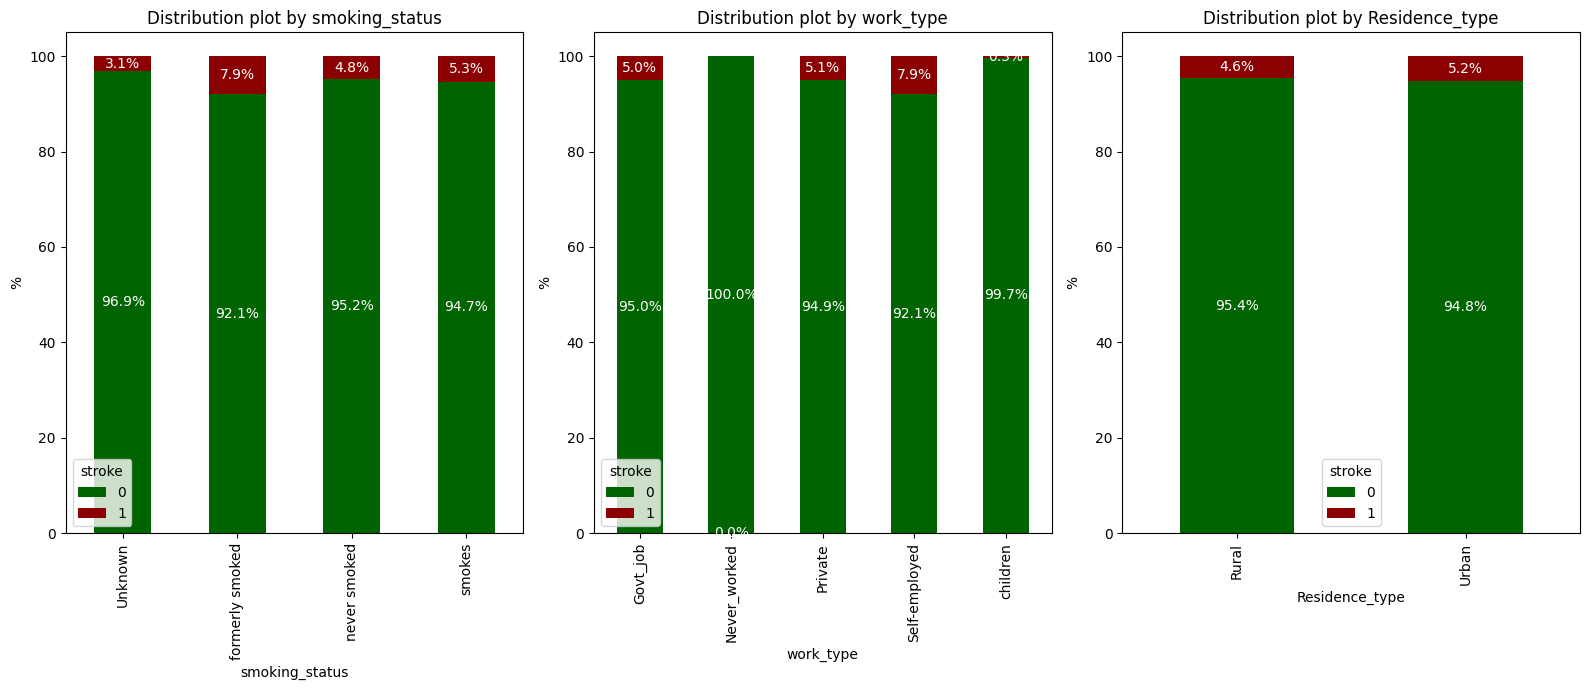

In [56]:
cols = ['smoking_status', 'work_type', 'Residence_type']
fig,axs = plt.subplots(1,3, figsize=(16,7))

for i in range(len(cols)):

    sub_data = data[[cols[i], 'stroke']]
    grouped_data = sub_data.groupby([cols[i], 'stroke']).size().unstack()
    grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)*100


    ax = grouped_data_percentage.plot(kind='bar', stacked=True, color=['darkgreen', 'darkred'], ax=axs[i])

    ax.set_xlabel(cols[i])
    ax.set_ylabel('%')
    ax.set_title(f'Distribution plot by {cols[i]}')

    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        percentage = f'{height:.1f}%'
        ax.annotate(percentage, (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')



plt.tight_layout()
plt.show()

In [57]:

data['smoking_status'] = data['smoking_status'].replace('Unknown', 'formerly smoked')
data['work_type'] = data['work_type'].replace('children', 'Never_worked')

In [58]:
col_to_drop = ['id', 'age_bin', 'gender_age']

In [59]:
data = data.drop(columns=col_to_drop)

In [60]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [61]:
data.to_csv(os.path.join(config.root_dir, "data.csv"),index = False)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5066 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5066 non-null   category
 1   age                5066 non-null   int64   
 2   hypertension       5066 non-null   int64   
 3   heart_disease      5066 non-null   int64   
 4   ever_married       5066 non-null   category
 5   work_type          5066 non-null   category
 6   Residence_type     5066 non-null   category
 7   avg_glucose_level  5066 non-null   float64 
 8   bmi                5066 non-null   float64 
 9   smoking_status     5066 non-null   category
 10  stroke             5066 non-null   int64   
dtypes: category(5), float64(2), int64(4)
memory usage: 431.5 KB


In [63]:
from stroke_risk.utils.common import read_yaml
from pathlib import Path

In [64]:
schema = read_yaml(Path('schema.yaml'))
schema

[2024-01-04 22:44:06,562: INFO: common: yaml file: schema.yaml loaded successfully]


ConfigBox({'COLUMNS': {'gender': 'object', 'age': 'int64', 'hypertension': 'int64', 'heart_disease': 'int64', 'ever_married': 'object', 'work_type': 'object', 'Residence_type': 'object', 'avg_glucose_level': 'float64', 'bmi': 'float64', 'smoking_status': 'object', 'stroke': 'int64'}, 'TARGET_COLUMN': {'name': 'stroke'}})

In [65]:
schema.COLUMNS

ConfigBox({'gender': 'object', 'age': 'int64', 'hypertension': 'int64', 'heart_disease': 'int64', 'ever_married': 'object', 'work_type': 'object', 'Residence_type': 'object', 'avg_glucose_level': 'float64', 'bmi': 'float64', 'smoking_status': 'object', 'stroke': 'int64'})

In [66]:
schema.COLUMNS.gender

'object'

In [67]:
data.gender.dtype.name

'category'

In [68]:
schema.COLUMNS.gender == data.gender.dtype.name

False

In [69]:
allcol = list(data.columns)
allscm = schema.COLUMNS

In [70]:
allcol

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [71]:
allcol[1]

'age'

In [72]:
allscm.age

'int64'

In [73]:
allscm[allcol[1]]

'int64'

In [74]:
col=allcol[1]

In [75]:
col=allcol[0]
allscm[col] != data[col].dtype.name

True

In [76]:
allscm[col]

'object'

In [77]:
data[col].dtype.name

'category'

In [78]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction'

In [79]:
root_dir

'artifacts/data_preprocess'

In [80]:
with open('artifacts\data_validation\status.txt', 'r') as f:
    status = [stat.strip() for stat in f.readlines()]
    f.close()

In [81]:
status = {key.strip(): value.strip().lower()=='true' for key,value in [stat.split(':') for stat in status]}

In [82]:
status

{'COLUMNS': True,
 'gender': True,
 'age': True,
 'hypertension': True,
 'heart_disease': True,
 'ever_married': True,
 'work_type': True,
 'Residence_type': True,
 'avg_glucose_level': True,
 'bmi': True,
 'smoking_status': True,
 'stroke': True}

In [83]:
all_values = status.values()
all_values

dict_values([True, True, True, True, True, True, True, True, True, True, True, True])

In [84]:
if all(status.values()):
    print('ttt')
else:
    print('fff')

ttt


# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [85]:
import pandas as pd

In [86]:
data= pd.read_csv('artifacts\data_preprocess\data.csv')

In [87]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,31.552791,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [88]:
data['age'].dtype

dtype('int64')

In [89]:
cols = [col for col in list(data.columns) if data[col].dtype=='object']

In [90]:
cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [91]:
for col in cols:
    labels = len(data[col].unique())
    print(f'{col}: {labels} labels')

gender: 2 labels
ever_married: 2 labels
work_type: 4 labels
Residence_type: 2 labels
smoking_status: 3 labels


In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender']) # male=1, female=0
data['ever_married'] = label_encoder.fit_transform(data['ever_married']) # yes=1, no=0
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type']) # urban=1, rural=0

In [93]:
data = pd.get_dummies(data, columns=['work_type', 'smoking_status'])

In [94]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.600000,1,False,False,True,False,True,False,False
1,0,61,0,0,1,0,202.21,31.552791,1,False,False,False,True,False,True,False
2,1,80,0,1,1,0,105.92,32.500000,1,False,False,True,False,False,True,False
3,0,49,0,0,1,1,171.23,34.400000,1,False,False,True,False,False,False,True
4,0,79,1,0,1,0,174.12,24.000000,1,False,False,False,True,False,True,False


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


reg = LogisticRegression()

In [96]:
data.columns[data.columns != 'stroke']

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [97]:
y=data.drop(columns=data.columns[data.columns != 'stroke'])

In [98]:
y=data['stroke']

In [99]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5061    0
5062    0
5063    0
5064    0
5065    0
Name: stroke, Length: 5066, dtype: int64

In [100]:
x=data.drop(columns='stroke')

In [101]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.600000,False,False,True,False,True,False,False
1,0,61,0,0,1,0,202.21,31.552791,False,False,False,True,False,True,False
2,1,80,0,1,1,0,105.92,32.500000,False,False,True,False,False,True,False
3,0,49,0,0,1,1,171.23,34.400000,False,False,True,False,False,False,True
4,0,79,1,0,1,0,174.12,24.000000,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,0,80,1,0,1,1,83.75,28.489139,False,False,True,False,False,True,False
5062,0,81,0,0,1,1,125.20,40.000000,False,False,False,True,False,True,False
5063,0,35,0,0,1,0,82.99,30.600000,False,False,False,True,False,True,False
5064,1,51,0,0,1,0,166.29,25.600000,False,False,True,False,True,False,False


In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [103]:
model = reg.fit(x_train,y_train)

c:\Users\asbpi\anaconda3\envs\stroke\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
y_pred = model.predict(x_test)

In [105]:
accuracy_score(y_test,y_pred)

0.9575936883629191

In [106]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [107]:
model = reg.fit(x_train,y_train)

In [108]:
y_pred = model.predict(x_test)

In [109]:
accuracy_score(y_test,y_pred)

0.9575936883629191

In [110]:
# Encoding scaling spliting

In [111]:
import pandas as pd
import os

In [112]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction'

In [113]:
# os.chdir('../')

In [114]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction'

In [115]:
def encode():
    data= pd.read_csv('artifacts\data_preprocess\data.csv')

    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    data['gender'] = label_encoder.fit_transform(data['gender']) # male=1, female=0
    data['ever_married'] = label_encoder.fit_transform(data['ever_married']) # yes=1, no=0
    data['Residence_type'] = label_encoder.fit_transform(data['Residence_type']) # urban=1, rural=0

    data = pd.get_dummies(data, columns=['work_type', 'smoking_status'])

    return data

In [116]:
encode()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.600000,1,False,False,True,False,True,False,False
1,0,61,0,0,1,0,202.21,31.552791,1,False,False,False,True,False,True,False
2,1,80,0,1,1,0,105.92,32.500000,1,False,False,True,False,False,True,False
3,0,49,0,0,1,1,171.23,34.400000,1,False,False,True,False,False,False,True
4,0,79,1,0,1,0,174.12,24.000000,1,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,0,80,1,0,1,1,83.75,28.489139,0,False,False,True,False,False,True,False
5062,0,81,0,0,1,1,125.20,40.000000,0,False,False,False,True,False,True,False
5063,0,35,0,0,1,0,82.99,30.600000,0,False,False,False,True,False,True,False
5064,1,51,0,0,1,0,166.29,25.600000,0,False,False,True,False,True,False,False


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
data = encode()
train,test = train_test_split(data, test_size=0.2)

print(train.shape, test.shape)

(4052, 16) (1014, 16)


In [119]:
target_column = 'stroke'

In [120]:
x_train = train.drop(target_column, axis=1)
x_test = test.drop(target_column, axis=1)
y_train = train[target_column]
y_test = test[target_column]

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [124]:
# lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(
    n_estimators=300,
    criterion='gini',
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

In [125]:
def training(model):
    mdl = model
    mdl.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ac = accuracy_score(y_test,y_pred)
    return ac

In [126]:
model_list = [dt, rf]

for model in model_list:
    ac = training(model=model)
    print(f'{model} accuracy_score : {ac}')

DecisionTreeClassifier() accuracy_score : 0.9211045364891519
RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=42) accuracy_score : 0.9546351084812623


In [127]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [128]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction'

In [129]:
train.head(1)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2914,1,46,0,1,1,1,80.01,33.0,0,True,False,False,False,True,False,False


In [130]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [131]:
train.iloc[2476]

gender                                 1
age                                   74
hypertension                           0
heart_disease                          0
ever_married                           1
Residence_type                         1
avg_glucose_level                 227.94
bmi                                 26.0
stroke                                 0
work_type_Govt_job                 False
work_type_Never_worked             False
work_type_Private                   True
work_type_Self-employed            False
smoking_status_formerly smoked      True
smoking_status_never smoked        False
smoking_status_smokes              False
Name: 2452, dtype: object

In [132]:
train['stroke'].value_counts()

stroke
0    3849
1     203
Name: count, dtype: int64

In [133]:
train_x = train.drop(columns='stroke')

In [ ]:
107,159,74

In [181]:
train.iloc[2]

gender                                1
age                                   2
hypertension                          0
heart_disease                         0
ever_married                          0
Residence_type                        1
avg_glucose_level                 89.32
bmi                                17.2
stroke                                0
work_type_Govt_job                False
work_type_Never_worked             True
work_type_Private                 False
work_type_Self-employed           False
smoking_status_formerly smoked     True
smoking_status_never smoked       False
smoking_status_smokes             False
Name: 4028, dtype: object

In [135]:
row_values = train_x.iloc[4002].tolist()
row_values

[1, 55, 0, 0, 1, 0, 56.87, 28.9, False, False, True, False, True, False, False]

In [136]:
model.predict([row_values])

array([0], dtype=int64)

In [137]:
a = {'w': 2, 'e': 3, 'r': 4}

b = []

for key, value in a.items():
    if key == 'e':
        value = [0,0,1]
        b.append(value)
    else:
        b.append(value)
b

[2, [0, 0, 1], 4]

In [138]:
def flatten_list(nested_list):
    flattened_list = []
    for item in nested_list:
        if isinstance(item, list):
            flattened_list.extend(flatten_list(item))
        else:
            flattened_list.append(item)
    return flattened_list

In [139]:
flatten_list(b)

[2, 0, 0, 1, 4]

In [140]:
class PredictionFromData:
    def __init__(self, userdata) -> None:
        self.userdata = userdata

    def making_nested_dict(self):
        datadict = self.userdata
        nesteddict = []
        for key, value in datadict.items():
            if key == 'e':
                value = [0, 0, 1]
                nesteddict.append(value)
            else:
                nesteddict.append(value)
        return nesteddict

    def making_flatten_list(self):
        nested_dict = self.making_nested_dict()
        flattened_list = []
        for item in nested_dict:
            if isinstance(item, list):
                flattened_list.extend(item)
            else:
                flattened_list.append(item)
        return flattened_list

a = {'w': 2, 'e': 3, 'r': 4}
prediction_instance = PredictionFromData(a)
result = prediction_instance.making_flatten_list()
print(result)

[2, 0, 0, 1, 4]


In [141]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction'

In [142]:
import pandas as pd

In [143]:
data = pd.read_csv('artifacts\data_preprocess\data.csv')

In [144]:
data.shape

(5066, 11)

In [145]:
yesdata = data[data['stroke']==1]
nodata = data[data['stroke']==0]

In [146]:
data['stroke'].value_counts().values

array([4817,  249], dtype=int64)

<BarContainer object of 2 artists>

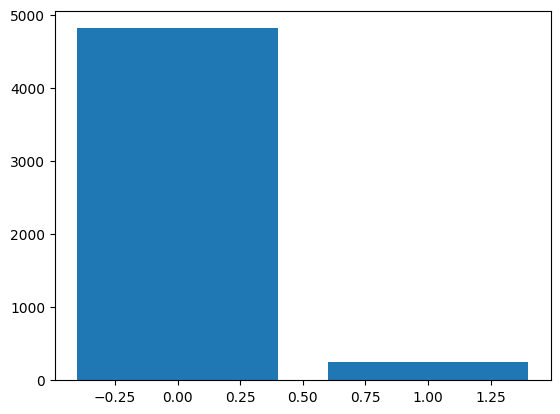

In [147]:
plt.bar([0,1],data['stroke'].value_counts().values)

In [148]:
train['stroke'].value_counts()

stroke
0    3849
1     203
Name: count, dtype: int64

In [149]:
train_x = train.drop(columns='stroke')
train_y = train['stroke']

In [150]:
train_y.value_counts()

stroke
0    3849
1     203
Name: count, dtype: int64

In [151]:
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

In [152]:
ros = SMOTETomek(sampling_strategy='minority', random_state=42)

In [153]:
xt_ros , yt_ros = ros.fit_resample(train_x,train_y)

In [154]:
yt_ros.value_counts()

stroke
0    3818
1    3818
Name: count, dtype: int64

In [155]:
pwd

'c:\\Users\\asbpi\\Desktop\\ASB\\Data_Science\\Projects\\MY Projects\\Stroke-Risk-Prediction'

In [156]:
# import os
# os.chdir('../')

In [157]:
import joblib

In [158]:
model = joblib.load('model\model.joblib')

In [159]:
model.predict([[0, 27, 0, 0, 0, 1, 85.53, 26.9, True, False, False, False, False, False, True]])

c:\Users\asbpi\anaconda3\envs\stroke\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [160]:
model.predict_proba([[0, 27, 0, 0, 0, 1, 85.53, 26.9, True, False, False, False, False, False, True]])

c:\Users\asbpi\anaconda3\envs\stroke\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.98106619, 0.01893381]])

In [183]:
yt_ros[yt_ros==1]

20      1
60      1
117     1
122     1
127     1
       ..
7631    1
7632    1
7633    1
7634    1
7635    1
Name: stroke, Length: 3818, dtype: int64

In [184]:
yt_ros[20]

1

In [189]:
record = xt_ros.iloc[20].tolist()
record

[0,
 54,
 0,
 0,
 1,
 0,
 191.82,
 40.4,
 False,
 False,
 False,
 True,
 False,
 False,
 True]

In [ ]:
[0,54,0,0,1,0,191.82,40.4,False,False,False,True,False,False,True]

In [191]:
xt_ros.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [192]:
model.predict([[0,81,1,0,1,0,80.43,29.7,False,False,True,False,False,True,False]])

c:\Users\asbpi\anaconda3\envs\stroke\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [193]:
model.predict_proba([[0,81,1,0,1,0,80.43,29.7,False,False,True,False,False,True,False]])

c:\Users\asbpi\anaconda3\envs\stroke\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.30402816, 0.69597184]])

In [194]:
model.predict_proba([[0, 27, 0, 0, 0, 1, 85.53, 26.9, True, False, False, False, False, False, True]])

c:\Users\asbpi\anaconda3\envs\stroke\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.98106619, 0.01893381]])